<h3>Import libraries to use for this project</h3>


In [1]:
import pandas as pd
import sqlite3
import numpy as np
import os
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Understanding and Exploration</h2>
1. IMDB database  

In [2]:
#connect to the SQL database
# Define the path to the database file

db_path = "data\im.db\im.db"
conn = sqlite3.connect(db_path)



In [3]:
#view list of tables
query =  "SELECT name FROM sqlite_master WHERE type='table';"
imdb_df = pd.read_sql(query, conn)
imdb_df


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,moviesInfo


In [4]:
#view details of the first table - movie basics
movie_basics_query = "SELECT * FROM movie_basics"
movie_basics_df = pd.read_sql(movie_basics_query, conn)
movie_basics_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
movie_basics_df.columns
#use the .info method to have a general idea about the dataframe - the columns, their values

movie_basics_df.info

<bound method DataFrame.info of          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad

movie basic table has 6 column : movie_id	primary_title	original_title	start_year	runtime_minutes	genres

In [6]:
#read the contents of the second table to use for this project - movie ratings
movie_ratings_query = "SELECT * FROM movie_ratings"
movie_ratings_df = pd.read_sql(movie_ratings_query, conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Movie ratings has three columns - movie_id, averagerating, numvotes

# DATA CLEANING


In [7]:
#check to establish if the movie_basic df has any missing values 
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [8]:
#check for missing values in the movies_basics dataframe in percentage
missing_percentage = movie_basics_df.isna().mean() * 100
missing_percentage


movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [9]:
#VISUALLY CHECK FOR NULL VALUES IN THE FIRST TABLE
query = """SELECT * 
              FROM movie_basics 
              WHERE runtime_minutes IS NULL;"""
movie_basics_null = pd.read_sql(query, conn)
movie_basics_null


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,None,"Comedy,Drama"
1,tt0112502,Bigfoot,Bigfoot,2017,None,"Horror,Thriller"
2,tt0139613,O Silêncio,O Silêncio,2012,None,"Documentary,History"
3,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,None,None
4,tt0250404,Godfather,Godfather,2012,None,"Crime,Drama"
...,...,...,...,...,...,...
31734,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,None,Family
31735,tt9916428,The Secret of China,The Secret of China,2019,None,"Adventure,History,War"
31736,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,None,Documentary
31737,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,None,Comedy


In [10]:
len(movie_basics_null)

31739

There are 31,739 rows that have no input/data for the runtime minutes for the movies. 
The number of rows in the table are 146,144, that makes for almost 22% of the total data with missing values. Because the data is more than 20%, it is crucial to explore imputation techniques to fill in the gaps. The imputation technique used for this set is the median incase there are outliers in the column. 



The genres column has a 3% output which indicates that only 3% of rows in that column have missing data. Because the missing data in this column is less than 5 %, it is considered safe to drop this rows without it significantly impacting the analysis


In [11]:
print(missing_percentage[missing_percentage > 0])

original_title      0.014369
runtime_minutes    21.717621
genres              3.700460
dtype: float64


In [12]:
##Fill missing values for columns with more than 20% missing data
movie_basics_cleaned = movie_basics_df.fillna(movie_basics_df.median())
movie_basics_cleaned

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [13]:
#check if there are missing vlaues in the cleaned df
runtime_minutes_null_check = movie_basics_cleaned.isnull().mean() * 100
runtime_minutes_null_check

movie_id           0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             3.700460
dtype: float64

Once the dataframe has been imputed by using the median, the dataframe is further cleaned by dropping the rows with missing values. As per the cell above, the output shows that the column named genres has 3.7 % of its values missing. 
Droping the rows makes more sense because the proportion of rows with missing values is very small compared to the overall dataset

In [14]:
movie_basics_clean_df = movie_basics_cleaned.dropna()
movie_basics_clean_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,87.0,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy


In [15]:
#check to see if there are still any missing data
movie_basics_clean_df.isna().sum()


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Initially, there were missing values in the original column title but after dropping the rows with missing vlaues, they were dropped as well. 

In [16]:
#check to see if there are any missing values  
movie_basics_clean_df.isna().sum()


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

<h3>The last datafame called "movie_basics_clean_df" is clean</h3>

##### SAVE THE CLEANED df TO A NEW TABLE IN THE DATABASE. The new table is called moviesInfo.

In [17]:
movie_basics_clean_df.to_sql('moviesInfo',conn, if_exists='replace', index=False) 

# DATAFRAME 2 DATA CLEANING - movie_ratings_df

In [18]:
#check df info
movie_ratings_df.info

<bound method DataFrame.info of          movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [19]:
#check to see if there are any null values in the df 
movie_ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

There are no null values in this dataframe 

# Exploratory Data Analysis
Analyzing the two clean tables - moviesInfo and movie_ratings


<h2>Curious to find out</h2>

<ol> 1. Which movies have the highest and lowest rating?</ol>
<ol> 2. What is the distribution of movie ratings?</ol>
<ol> 3. What is the common movie genre</ol>
<ol> 4. What is the average rating based per each genre?</ol>
<ol> 5. what is the rating distribution of popular genres?</ol>




In [20]:
#join the two dataframes together based group by 
query_movie_info = """SELECT mi.movie_id, mi.primary_title, mi.start_year, mi.genres, mr.averagerating 
                        FROM moviesInfo mi
                        JOIN movie_ratings mr
                        ON mi.movie_id = mr.movie_id
                        GROUP BY genres
                        order by mr.averagerating ;
                        
                    """
joined_movie_df = pd.read_sql(query_movie_info, conn)
joined_movie_df


,movie_id,primary_title,start_year,genres,averagerating
0,tt3437164,Maldito Amor,2014,"Comedy,History,Horror",1.1
1,tt1865374,Futures Past,2012,"Action,Biography,History",1.3
2,tt5161302,Eyal Hirrifah,2015,"Comedy,Musical,Sport",1.4
3,tt0937353,The Devil's Flower,2010,"Mystery,Romance",1.7
4,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9
...,...,...,...,...,...
918,tt5903964,The Long Count Teaser,2016,"History,Sport",9.2
919,tt3856476,Sunakali,2017,"Documentary,Family,Musical",9.3
920,tt4135932,Lost Conquest,2015,"Comedy,Documentary,Fantasy",9.4
921,tt10146728,Foosballers,2019,"Comedy,Documentary,Sport",9.7


#### <ol> 1. Which movies have the highest and lowest rating?</ol>

In [21]:
#top 10 highest rated movies 
top_rated_movies = joined_movie_df.sort_values(by="averagerating", ascending=False).head(10)
top_rated_movies[['primary_title','genres','averagerating']]


,primary_title,genres,averagerating
922,Love on a Leash,"Documentary,Family,Romance",9.7
921,Foosballers,"Comedy,Documentary,Sport",9.7
920,Lost Conquest,"Comedy,Documentary,Fantasy",9.4
919,Sunakali,"Documentary,Family,Musical",9.3
918,The Long Count Teaser,"History,Sport",9.2
917,Ratne Price Sa Kosara,"Documentary,History,War",9.2
916,Los días de Ayotzinapa (The 43s),"Crime,Documentary,Drama",9.2
915,Sweet Science,"Action,Documentary,Sport",9.2
914,Road to Pride,"Comedy,Documentary,Romance",9.1
913,Blood Army,War,9.0


In [22]:
#top 10 lowest rated movies
lowest_rated_movies = joined_movie_df.sort_values(by='averagerating').head(10)
lowest_rated_movies[['primary_title', 'genres', 'averagerating']]

,primary_title,genres,averagerating
0,Maldito Amor,"Comedy,History,Horror",1.1
1,Futures Past,"Action,Biography,History",1.3
2,Eyal Hirrifah,"Comedy,Musical,Sport",1.4
3,The Devil's Flower,"Mystery,Romance",1.7
4,Foodfight!,"Action,Animation,Comedy",1.9
5,The Hospital 2,"Adult,Horror",2.0
6,Battle Earth,"Action,Sci-Fi,War",2.1
7,Fahr zur Hölle,"Action,Mystery",2.2
8,Ladies Mafia,"Adventure,Crime,Romance",2.3
9,The Broken Key,"History,Sci-Fi,Thriller",2.3


### 2. Distribution of movie ratings.

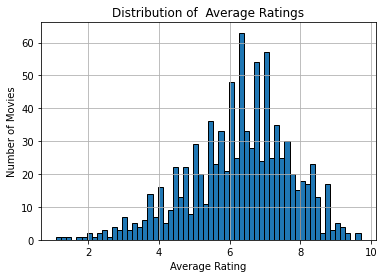

In [23]:
joined_movie_df['averagerating'].hist(bins=60, edgecolor="black")
plt.title("Distribution of  Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()

Most of the movie ratings in the IMDB database have an average rating of 6 out of 10  

what is the mode of the ratings in the database


In [24]:
joined_movie_df['averagerating'].mode()

0    6.4
dtype: float64

In [25]:
#most movies in the IMDB DB have an average rating of 6.4

### 3. Most common genres


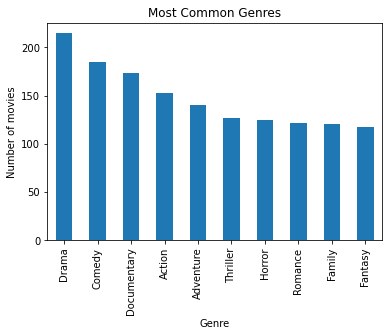

In [26]:
#split the genres column and make it into separate rows
df_genres = joined_movie_df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_genres.name = 'genre'
genre_counts = df_genres.value_counts()


# check how many counts there are 
len(genre_counts) #there are 26 genre counts

#plot the bar of the most common genres
genre_counts.head(10).plot(kind='bar')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

### 4. What is the average rating based per each genre?

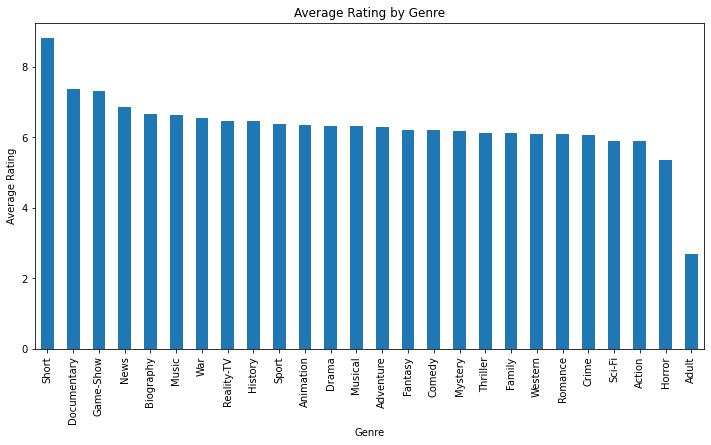

In [27]:
#merge the genres back into the original dataframe 
expanded_joined_df = joined_movie_df.drop('genres', axis=1).join(df_genres)

# Compute the average rating per genre
avg_rating_per_genre = expanded_joined_df.groupby('genre')['averagerating'].mean().sort_values(ascending=False)


#bar plot
avg_rating_per_genre.plot(kind='bar',figsize=(12,6))
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

### 5. Rating distribution for popular Genres

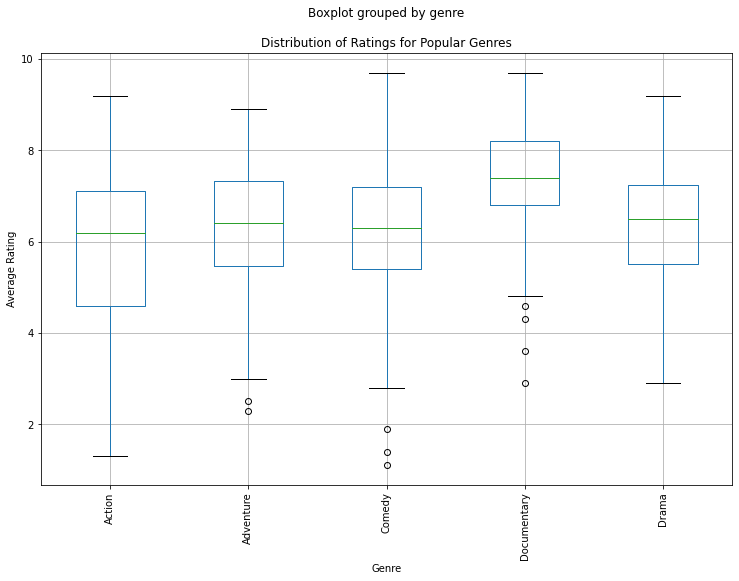

In [28]:
popular_genres = genre_counts.head(5).index

df_popular_genres = expanded_joined_df[expanded_joined_df['genre'].isin(popular_genres)]

# Box plot of ratings for popular genres
df_popular_genres.boxplot(column='averagerating', by='genre', figsize=(12, 8), rot=90)
plt.title('Distribution of Ratings for Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

## Initial Data Exploration on the BOM MOVIE dataframe

In [29]:
#read the csv file to a dataframe 

bom_movie_df = pd.read_csv(r'data\bom.movie_gross.csv')
bom_movie_df.head(5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
#more info on the dataset to understand the structure
bom_movie_df.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [31]:
#Check on the datatypes of each column 
bom_movie_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

## Data Cleaning -Handle Missing Values

In [32]:
#check to see if there are any null values
bom_movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [33]:
#check for missing values in the movies_basics dataframe in percentage
bomdf_missing_percentage = bom_movie_df.isna().mean() * 100
bomdf_missing_percentage

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

The dataset has missing value in columns : studio, domestic gross, and foreign cost. 
As *my*  rule of thumb, the columns with mising values that are less than 5%, the rows with the missing values will be dropped, as this is will not significantly impact the analysis.

In [34]:
#removing missing values from 2 columns "studio" and "domestic_gross"
bom_mov_clean1 = bom_movie_df.dropna(subset=['studio','domestic_gross'])
bom_mov_clean1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [35]:
#check to see if the missing calues have been removed from the two columns 
bom_mov_clean1.isna().sum() 

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

The only column left that has missing values is the foreign_gross column with 1,349 values missing! That is 40% of the total column of that data as shown in the cell below. 


In [36]:
bom_mov_clean1['foreign_gross'].isna().mean() * 100

40.19666269368295

Imputing the missing values can be a practical solution. Replace the missing values with a statistical measure either mean or median. 
1. First, check whether the data in the column Domestic gross is normally distributed or not, to decide whether to use the mean for normal distribution or median imputation if there are outliers/not normally distributed in the foreign gross column. 
*The assumption been made here is that both values in these two columns are positively corelated and are similar*

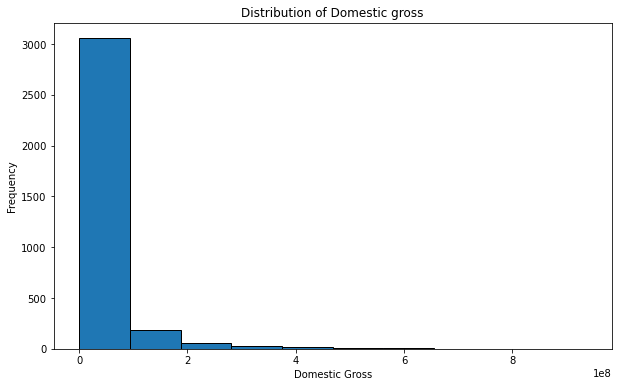

In [37]:

# plot histogram 
plt.figure(figsize=(10, 6))
plt.hist(bom_mov_clean1['domestic_gross'],bins=10, edgecolor="black")
plt.title("Distribution of Domestic gross")
plt.xlabel("Domestic Gross")
plt.ylabel("Frequency")
plt.show()


Using the domestic gross as a case study to see how the foreign gross is distributed, there is an uneven distribution, hence use the median as the imputation techniques for the foreign gross. 

In [38]:
#use the median as the imputation technique to remove missing values
#convert the string to numeric as it was a string 
bom_mov_clean1["foreign_gross"] = pd.to_numeric(bom_movie_df['foreign_gross'],errors="coerce")

#find the median 
median_foreign_gross = bom_mov_clean1['foreign_gross'].median()

#impute the null values with the median
bom_mov_clean1['foreign_gross'] = bom_mov_clean1['foreign_gross'].fillna(median_foreign_gross)
bom_mov_clean1



<ipython-input-38-e3fe964af55c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_mov_clean1["foreign_gross"] = pd.to_numeric(bom_movie_df['foreign_gross'],errors="coerce")
<ipython-input-38-e3fe964af55c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_mov_clean1['foreign_gross'] = bom_mov_clean1['foreign_gross'].fillna(median_foreign_gross)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,19600000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,19600000.0,2018
3384,El Pacto,Sony,2500.0,19600000.0,2018
3385,The Swan,Synergetic,2400.0,19600000.0,2018


In [39]:
# confirm that there are no missing values
bom_mov_clean1.isna().mean()* 100

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

#### The dataframe is clean

### Univariate Analysis 

1. What is the distribution of the gross revenues?
2. what is the distribution of movies by year?
3. What is the comparison of the gross revenues 
4. what is the gross revenue by year?
5. Which studio generates the highest domestic and local gross? - Performance of the studios



1. Distribution of Gross Revenues


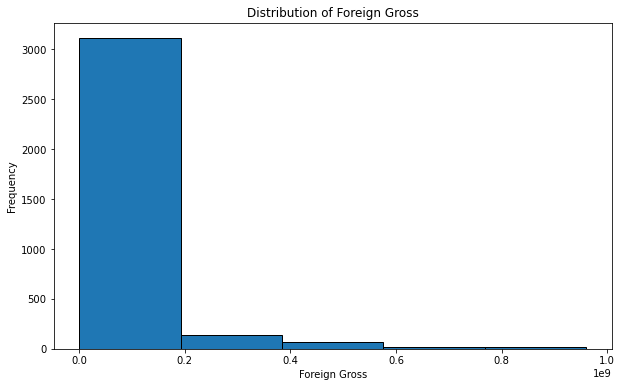

In [40]:

plt.figure(figsize=(10, 6))
plt.hist(bom_mov_clean1['foreign_gross'], bins=5, edgecolor='k')
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()

#1e9 represents 1,000,000,000



2. Distribution of Movies per Year

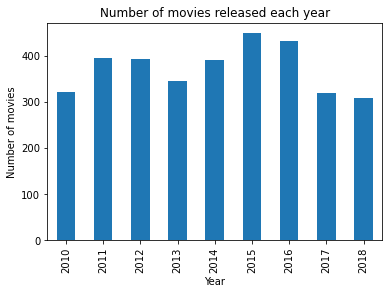

In [41]:
bom_mov_clean1['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of movies released each year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


## Bivariate Analysis

3. comparison of gross revenues

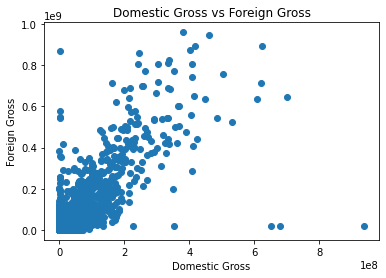

In [42]:
plt.scatter(bom_mov_clean1['domestic_gross'], bom_mov_clean1['foreign_gross'])
plt.title('Domestic Gross vs Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.show()

<p> 1e8 represents 100,000,000(one hundred million)  1 x 10^8</p>

1e9 reps 1 billion  1 x 10^9

4. Gross revenue by year

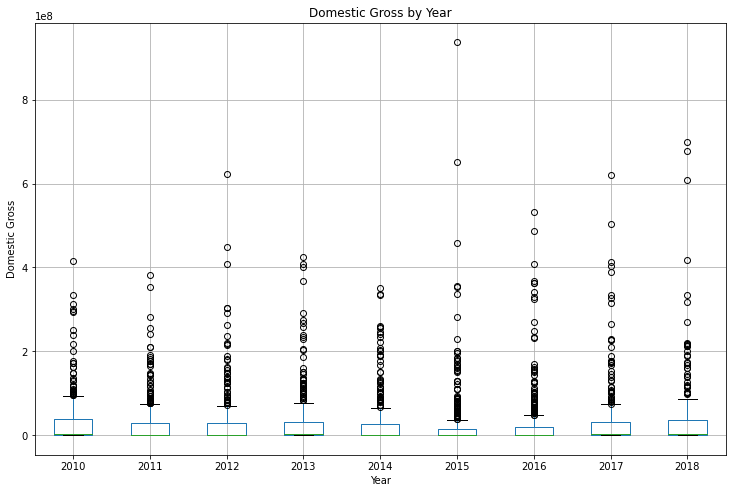

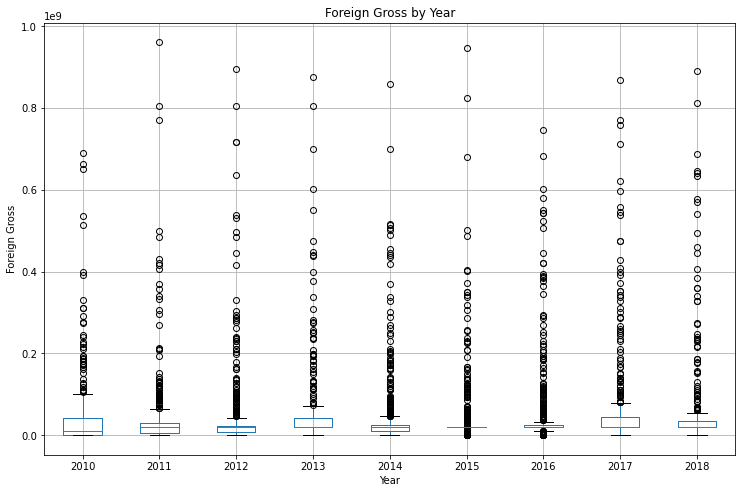

In [43]:
bom_mov_clean1.boxplot(column='domestic_gross', by='year', figsize=(12, 8))
plt.title('Domestic Gross by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.show()

bom_mov_clean1.boxplot(column='foreign_gross', by='year', figsize=(12, 8))
plt.title('Foreign Gross by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Foreign Gross')
plt.show()


5. Gross revenue by studio

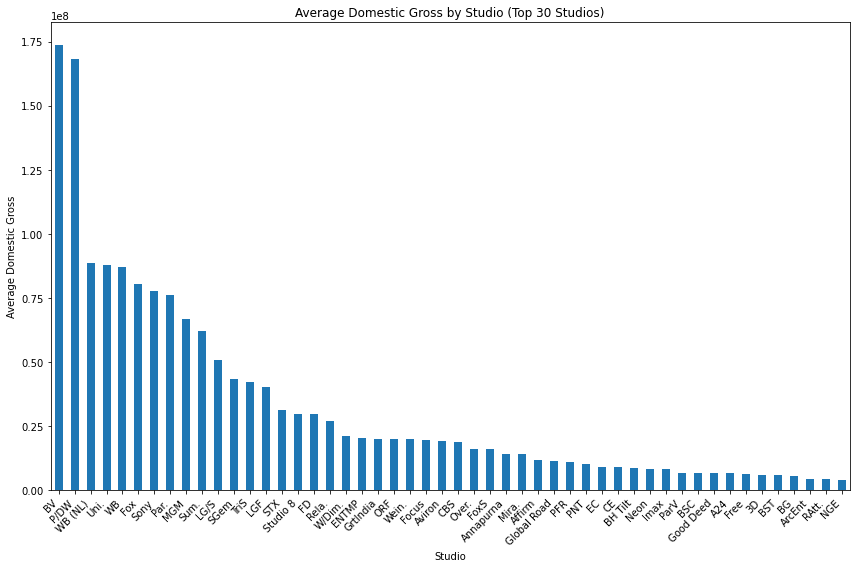

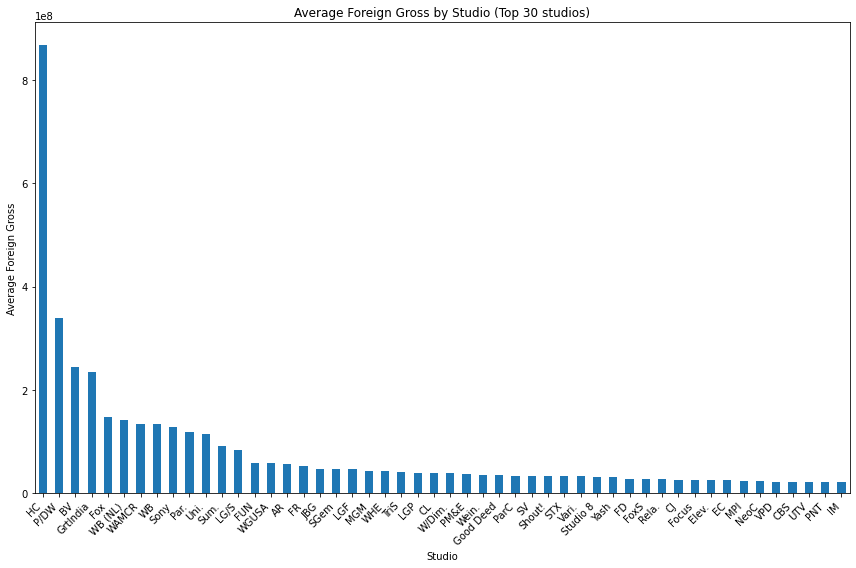

In [44]:
# Group by studio and calculate the mean domestic gross and foreign gross
avg_domestic_gross_by_studio = bom_mov_clean1.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)
avg_foreign_gross_by_studio = bom_mov_clean1.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False)


# Select the top 50 studios
top_30_studios = avg_domestic_gross_by_studio.head(50)
top_30_studios_f = avg_foreign_gross_by_studio.head(50)
# Plot the bar chart
top_30_studios.plot(kind='bar', figsize=(12, 8))
plt.title('Average Domestic Gross by Studio (Top 30 Studios)')
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


top_30_studios_f.plot(kind='bar', figsize=(12,8))
plt.title('Average Foreign Gross by Studio (Top 30 studios)')
plt.xlabel('Studio')
plt.ylabel('Average Foreign Gross')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


6. Top rated movies by Gross revenues

In [45]:
bom_mov_clean1['total_gross'] = bom_mov_clean1['domestic_gross'] + bom_mov_clean1['foreign_gross']
top_movies = bom_mov_clean1.sort_values(by='total_gross', ascending=False).head(10)
top_movies[['title', 'total_gross']]

<ipython-input-45-be146240aa6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_mov_clean1['total_gross'] = bom_mov_clean1['domestic_gross'] + bom_mov_clean1['foreign_gross']


,title,total_gross
727,Marvel's The Avengers,1.518900e+09
1875,Avengers: Age of Ultron,1.405400e+09
3080,Black Panther,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
2758,Star Wars: The Last Jedi,1.332600e+09
3081,Jurassic World: Fallen Kingdom,1.309500e+09
1127,Frozen,1.276400e+09
2759,Beauty and the Beast (2017),1.263500e+09
3082,Incredibles 2,1.242800e+09
1128,Iron Man 3,1.214800e+09


Correlation Analysis

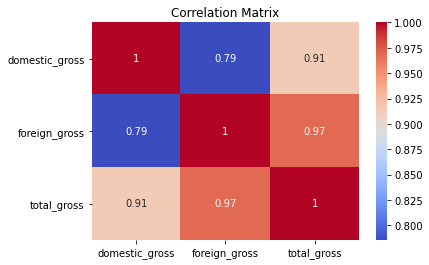

In [46]:
correlation_matrix = bom_mov_clean1[['domestic_gross', 'foreign_gross', 'total_gross']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Third dataset 

data\rt.movie_info.tsv

In [47]:
import pandas as pd 
rt_movie = pd.read_csv('data/rt.movie_info.tsv', sep = '\t')
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [48]:
rt_movie.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [49]:
rt_movie.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [50]:
# check the datatype of the dataframe 
rt_movie.dtypes
# all variables are objects 

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [51]:
#check for missing values in % form 
rt_movie.isna().mean() * 100

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

## DATA CLEANING 

The rt_movie dataframe has many missing values in all columns except the id column. 
As my rule of thumb, columns with missing values of less than 5 %, those rows will be dropped. 




In [52]:
# drop the rows that have missing values in the synopsis, rating, genre,rutime columns
#check the datatype, object
# the values are "words"/ strings in base python  

rt_movie_clean_1 = rt_movie.dropna(subset = ['synopsis', 'rating', 'genre', 'runtime'])
rt_movie_clean_1



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [53]:
#check for missing values in % form 
rt_movie_clean_1.isna().mean() * 100

id               0.000000
synopsis         0.000000
rating           0.000000
genre            0.000000
director        11.538462
writer          26.585695
theater_date    19.635628
dvd_date        19.635628
currency        77.192982
box_office      77.192982
runtime          0.000000
studio          67.071525
dtype: float64

The columns that had missing values of less than 5% have been cleaned by dropping their associated rows as it wont have a big impact on data analysis.

In [54]:
#checking whether the director column has a mode value 
print(rt_movie_clean_1['director'].mode())
print(rt_movie_clean_1['writer'].mode())
print(rt_movie_clean_1['studio'].mode())


0    Steven Spielberg
dtype: object
0    Woody Allen
dtype: object
0    Universal Pictures
dtype: object


In [55]:
#drop the rows whose columns have less than 20% missing values 
#dropping becasue they are all not categorical data to use the mode, median or mode are nor really useful 
#because the values are not numerical 

rt_movie_clean_2  = rt_movie_clean_1.dropna(subset=['director', 'theater_date','dvd_date', 'writer'])
rt_movie_clean_2

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1550,1990,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974","May 2, 2005",NaN,NaN,112 minutes,NaN
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage


In [56]:
#check for missing values in % form 
rt_movie_clean_2.isna().mean() * 100


id               0.000000
synopsis         0.000000
rating           0.000000
genre            0.000000
director         0.000000
writer           0.000000
theater_date     0.000000
dvd_date         0.000000
currency        70.715096
box_office      70.715096
runtime          0.000000
studio          59.477866
dtype: float64

In [57]:
#drop the remaining columns with missing dat aof more than 30% 
rt_movies_final = rt_movie_clean_2.dropna(axis="columns")
rt_movies_final

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes
...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",98 minutes
1550,1990,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974","May 2, 2005",112 minutes
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",116 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes


In [58]:
#check for missing values in % form 
rt_movies_final.isna().mean() * 100

id              0.0
synopsis        0.0
rating          0.0
genre           0.0
director        0.0
writer          0.0
theater_date    0.0
dvd_date        0.0
runtime         0.0
dtype: float64

In [59]:
rt_movies_final.describe()

,id
count,881.000000
mean,1005.664018
std,576.094502
min,1.000000
25%,507.000000
50%,1000.000000
75%,1508.000000
max,1999.000000


In [60]:
rt_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            881 non-null    int64 
 1   synopsis      881 non-null    object
 2   rating        881 non-null    object
 3   genre         881 non-null    object
 4   director      881 non-null    object
 5   writer        881 non-null    object
 6   theater_date  881 non-null    object
 7   dvd_date      881 non-null    object
 8   runtime       881 non-null    object
dtypes: int64(1), object(8)
memory usage: 68.8+ KB


In [61]:
#CONVERT THE DATATYPES TO THE RIGHT DATAYPES 
rt_movies_final['theater_date'] = pd.to_datetime(rt_movies_final['theater_date'])
rt_movies_final['dvd_date'] = pd.to_datetime(rt_movies_final['dvd_date'])

<ipython-input-61-662382cd6021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movies_final['theater_date'] = pd.to_datetime(rt_movies_final['theater_date'])
<ipython-input-61-662382cd6021>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movies_final['dvd_date'] = pd.to_datetime(rt_movies_final['dvd_date'])


In [62]:
rt_movies_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            881 non-null    int64         
 1   synopsis      881 non-null    object        
 2   rating        881 non-null    object        
 3   genre         881 non-null    object        
 4   director      881 non-null    object        
 5   writer        881 non-null    object        
 6   theater_date  881 non-null    datetime64[ns]
 7   dvd_date      881 non-null    datetime64[ns]
 8   runtime       881 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 68.8+ KB


In [63]:
# Remove the 'minutes' text and convert to integer
rt_movies_final['runtime'] = rt_movies_final['runtime'].str.replace(' minutes', '').astype(int)
rt_movies_final.head(2)

<ipython-input-63-b0450549d6a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movies_final['runtime'] = rt_movies_final['runtime'].str.replace(' minutes', '').astype(int)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108


In [64]:
rt_movies_final.describe()

,id,runtime
count,881.000000,881.000000
mean,1005.664018,106.809308
std,576.094502,21.877447
min,1.000000,52.000000
25%,507.000000,93.000000
50%,1000.000000,103.000000
75%,1508.000000,116.000000
max,1999.000000,358.000000


In [65]:
rt_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            881 non-null    int64         
 1   synopsis      881 non-null    object        
 2   rating        881 non-null    object        
 3   genre         881 non-null    object        
 4   director      881 non-null    object        
 5   writer        881 non-null    object        
 6   theater_date  881 non-null    datetime64[ns]
 7   dvd_date      881 non-null    datetime64[ns]
 8   runtime       881 non-null    int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(5)
memory usage: 65.4+ KB


## 1. What is the distribution of runtime  minutes of the movies?


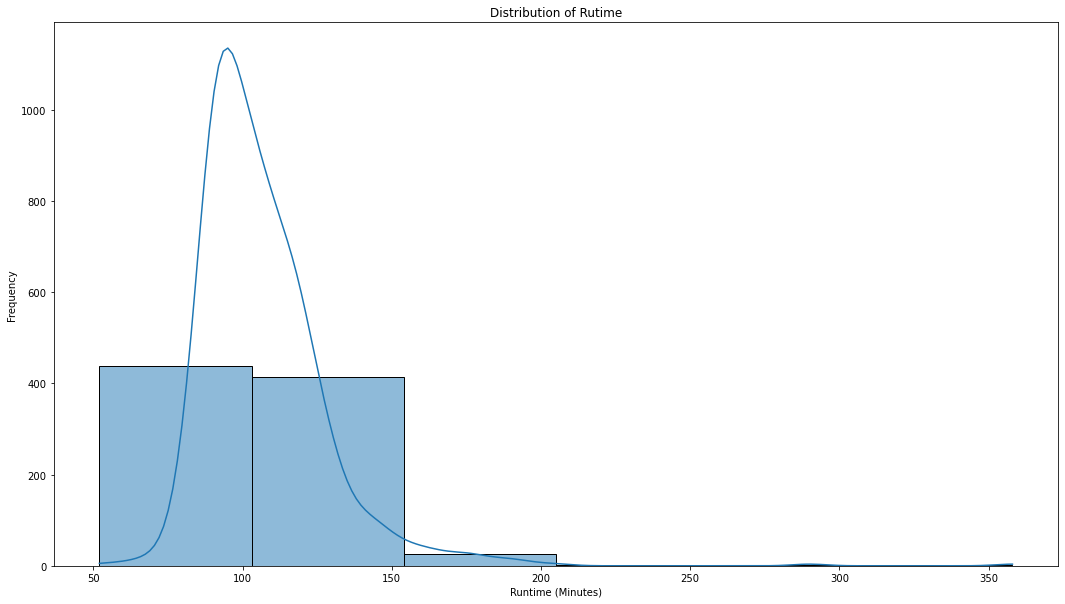

In [66]:
#plot a histogram

plt.figure(figsize=(18,10))
sns.histplot(rt_movies_final['runtime'], bins=6, kde=True )
plt.title('Distribution of Rutime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.show()

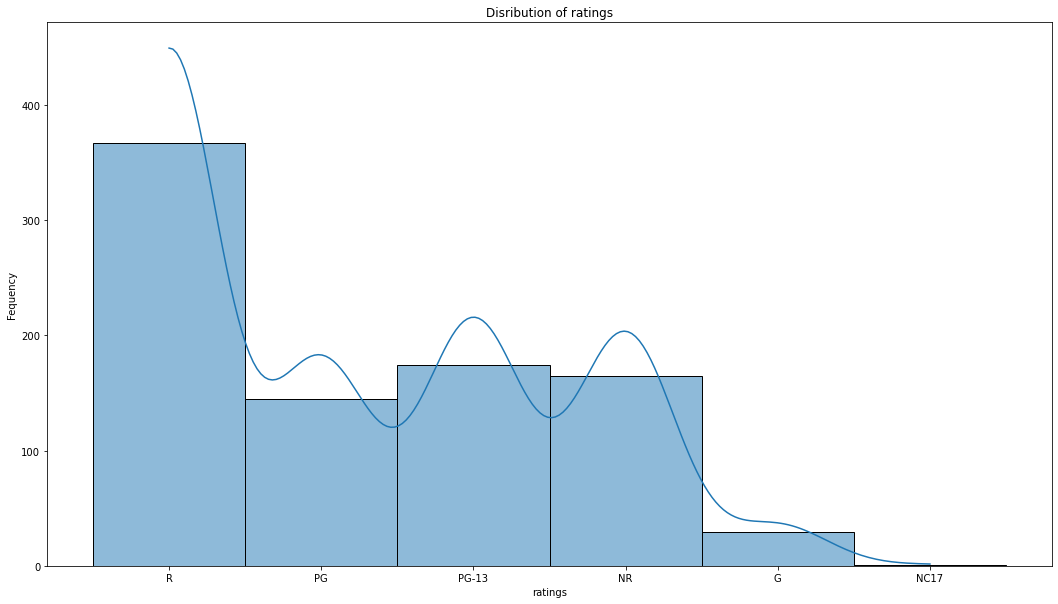

In [67]:
plt.figure(figsize=(18,10))
sns.histplot(rt_movies_final['rating'], bins= 6, kde=True)
plt.title( 'Disribution of ratings')
plt.xlabel('ratings')
plt.ylabel('Fequency')
plt.show()


## ANALYZING CATEGORICAL DATA


In [68]:
rt_movies_final['genre_list']= rt_movies_final['genre'].str.split('|')

all_genres = rt_movies_final['genre_list'].explode().value_counts()
all_genres 



<ipython-input-68-ca926bb444c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movies_final['genre_list']= rt_movies_final['genre'].str.split('|')


Drama                          543
Comedy                         352
Action and Adventure           194
Mystery and Suspense           182
Art House and International    134
Romance                        129
Science Fiction and Fantasy    110
Classics                       110
Horror                          79
Kids and Family                 63
Musical and Performing Arts     55
Animation                       29
Western                         24
Documentary                     18
Special Interest                15
Television                      14
Faith and Spirituality           7
Sports and Fitness               5
Cult Movies                      4
Gay and Lesbian                  2
Anime and Manga                  1
Name: genre_list, dtype: int64

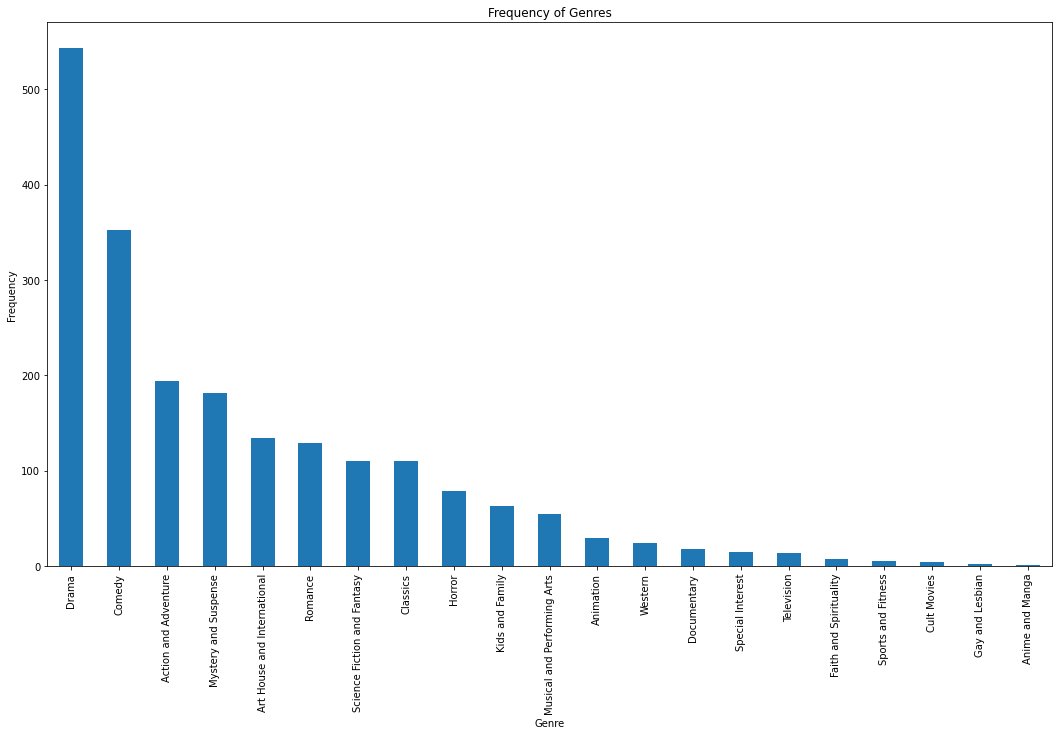

In [69]:
#plot the distribution of genres 

plt.figure(figsize = (18,10))
all_genres.plot(kind='bar')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

